# Video Game Analysis 

This notebook contains analysis of video game sales across different markets, genres, publishers and platforms.  The aim is to help studios analyse past video games sales and predict the best types of video games can help them generate most sales across different markets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

video_game_df = pd.read_csv('HW4-video-game-sales.csv') #import dataset

## Data cleaning process
#### Check errors in the data

In [2]:
video_game_df.head(10) #to view first 20 rows of data to check cleaning requirements

,Rank,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Nintendo:Wii,2006,Sports,41.49,29.02,3.77,8.46
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Super Mario Bros.,Nintendo:NES,1985,Platform,29.08,3.58,6.81,0.77
3,3,Mario Kart Wii,Nintendo:Wii,2008,Racing,15.85,12.88,3.79,3.31
4,4,Wii Sports Resort,Nintendo:Wii,2009,Sports,15.75,11.01,3.28,2.96
5,5,Pokemon Red/Pokemon Blue,Nintendo:GB,1996,Role-Playing,11.27,8.89,10.22,1
6,6,Tetris,Nintendo:GB,1989,Puzzle,23.2,2.26,4.22,0.58
7,7,New Super Mario Bros.,Nintendo:DS,2400,Platform,11.38,9.23,6.5,2.9
8,8,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
9,8,Wii Play,Nintendo:Wii,2006,Misc,14.03,9.2,2.93,2.85


In [3]:
video_game_df.sample(5)   #view random rows to facilitate with cleaning

,Rank,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8448,8442,Spyro: Shadow Legacy,Vivendi Games:DS,2005,Action,0.14,0.01,0,0.01
7369,7363,NHL 2K6,Take-Two Interactive:XB,2005,Sports,0.16,0.05,0,0.01
2535,2529,Shaun White Snowboarding,Ubisoft:X360,NaN,Sports,0.48,0.26,0,0.08
10599,10593,Tom Clancy's Ghost Recon: Predator,Ubisoft:PSP,2010,Shooter,0.07,0.02,0,0.02
10011,10005,Nobunaga no Yabou: Tenshoki,Tecmo Koei:SAT,1995,Strategy,0,0,0.11,0


In [4]:
replace_missing = video_game_df =='Missing'        #locate rows with 'Missing' values to replace with 'NaN'
video_game_df.loc[replace_missing.any(axis=1), :]

,Rank,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8,8,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


In [5]:
video_game_df2 = video_game_df.replace("Missing", np.nan) #replace rows with 'Missing' values with 'NaN'

In [6]:
#check if there are rows with duplicated name, publisher and year values
video_game_df3 = video_game_df2[video_game_df2[['Name', 'Publisher:Platform','Year']].duplicated() == True]   
video_game_df3.head()

,Rank,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No duplicate rows except 'NaN' values

##### End of checking for data to clean

## Percentage of the observations with clean data

In [7]:
#count number of elements in df
total_elements = int(video_game_df2.size)
print("Total elements in the df is", total_elements)

# count number of NaN values in df
missing_values = int(video_game_df2.isna().sum().sum())
print("Number of missing values in the df is", missing_values) 

# count total rows in dataframe
total_rows = int(video_game_df2.shape[0])
print("Total number of rows in the dataframe", total_rows)

#count number of rows with atleast 1 missing value
missing_in_rows= int(video_game_df2.isna().any(axis=1).sum())
print("Number of rows with atleast one missing value is", missing_in_rows) 

#percentage of rows to be cleaned
rows_cleaning_rqd = (missing_in_rows/total_rows)*100
print('Percent of rows require cleaning is', round(rows_cleaning_rqd, 2) )

#percent of observations to be cleaned
obs_cleaning_rqd = (missing_values/total_elements) * 100
print ('Percent of observations to be cleaned is', round(obs_cleaning_rqd, 2))

#Percent of observations containing clean data
clean_data_percent = 100 - obs_cleaning_rqd
print('Percent of observations containing clean data is', round(clean_data_percent, 2))

Total elements in the df is 149445
Number of missing values in the df is 333
Total number of rows in the dataframe 16605
Number of rows with atleast one missing value is 281
Percent of rows require cleaning is 1.69
Percent of observations to be cleaned is 0.22
Percent of observations containing clean data is 99.78


##### By looking across the dataframe, we can count number of observations with missing data. Comparing this with total number of observations, we can infer that approximately 99.78% of observations contain clean data. 

 ## Permanent deletion of rows from dataframe with more than 7 invalid values

In [8]:
# permanently drop rows with more than 7 missing values
video_game_df = video_game_df.dropna(thresh=7)
# dropped rows with 'Missing' values (row 8)
video_game_df.drop([8], axis=0, inplace=True) 

video_game_df.head(10)

,Rank,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Wii Sports,Nintendo:Wii,2006,Sports,41.49,29.02,3.77,8.46
2,2,Super Mario Bros.,Nintendo:NES,1985,Platform,29.08,3.58,6.81,0.77
3,3,Mario Kart Wii,Nintendo:Wii,2008,Racing,15.85,12.88,3.79,3.31
4,4,Wii Sports Resort,Nintendo:Wii,2009,Sports,15.75,11.01,3.28,2.96
5,5,Pokemon Red/Pokemon Blue,Nintendo:GB,1996,Role-Playing,11.27,8.89,10.22,1
6,6,Tetris,Nintendo:GB,1989,Puzzle,23.2,2.26,4.22,0.58
7,7,New Super Mario Bros.,Nintendo:DS,2400,Platform,11.38,9.23,6.5,2.9
9,8,Wii Play,Nintendo:Wii,2006,Misc,14.03,9.2,2.93,2.85
10,9,New Super Mario Bros. Wii,Nintendo:Wii,2009,Platform,14.59,7.06,4.7,2.26
11,10,Duck Hunt,Nintendo:NES,1984,Shooter,26.93,0.63,0.28,NaN


## Addition of column 'Global sales' to check total sales of video games across all markets

In [9]:
# convert 'object' datatype to 'float' for further calculations
video_game_df['NA_Sales'] = video_game_df['NA_Sales'].astype(float)
video_game_df['EU_Sales'] = video_game_df['EU_Sales'].astype(float)
video_game_df['JP_Sales'] = video_game_df['JP_Sales'].astype(float)
video_game_df['Other_Sales'] = video_game_df['Other_Sales'].astype(float)

In [10]:
#create new column 'total sales' which calculates total sales across all regions
video_game_df['Global_Sales'] = video_game_df['NA_Sales'] + video_game_df['EU_Sales'] + video_game_df['JP_Sales'] + video_game_df['Other_Sales']

In [11]:
#verify if global_sales has been added
video_game_df.head(10)

,Rank,Name,Publisher:Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo:Wii,2006,Sports,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,Nintendo:NES,1985,Platform,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Nintendo:Wii,2008,Racing,15.85,12.88,3.79,3.31,35.83
4,4,Wii Sports Resort,Nintendo:Wii,2009,Sports,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,Nintendo:GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38
6,6,Tetris,Nintendo:GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26
7,7,New Super Mario Bros.,Nintendo:DS,2400,Platform,11.38,9.23,6.50,2.90,30.01
9,8,Wii Play,Nintendo:Wii,2006,Misc,14.03,9.20,2.93,2.85,29.01
10,9,New Super Mario Bros. Wii,Nintendo:Wii,2009,Platform,14.59,7.06,4.70,2.26,28.61
11,10,Duck Hunt,Nintendo:NES,1984,Shooter,26.93,0.63,0.28,NaN,NaN


## Top 15 video games in terms of global sales

In [12]:
video_game_df4 = video_game_df.sort_values(by='Global_Sales', ascending=False)
print(video_game_df4[['Rank', 'Name', 'Publisher:Platform', 'Global_Sales']].head(15))

    Rank                       Name           Publisher:Platform  Global_Sales
0      1                 Wii Sports                 Nintendo:Wii         82.74
2      2          Super Mario Bros.                 Nintendo:NES         40.24
3      3             Mario Kart Wii                 Nintendo:Wii         35.83
4      4          Wii Sports Resort                 Nintendo:Wii         33.00
5      5   Pokemon Red/Pokemon Blue                  Nintendo:GB         31.38
6      6                     Tetris                  Nintendo:GB         30.26
7      7      New Super Mario Bros.                  Nintendo:DS         30.01
9      8                   Wii Play                 Nintendo:Wii         29.01
10     9  New Super Mario Bros. Wii                 Nintendo:Wii         28.61
12    11                 Nintendogs                  Nintendo:DS         24.75
13    12              Mario Kart DS                  Nintendo:DS         23.43
15    14                    Wii Fit                 

## Column 'Publisher:Platform' split into two columns named 'Publisher' and 'Platform' for ease with future analysis

In [13]:
#rename publisher:platform to publisher to remove colon for ease with split
video_game_df = video_game_df.rename(columns={'Publisher:Platform': 'Publisher'})

#split publisher:platform elements into 2 columns - publisher and platform
video_game_df[['Publisher','Platform']] = video_game_df.Publisher.apply(lambda x: pd.Series(str(x).split(":")))

In [14]:
#rearrange 'platform' from last column to column 4 
video_game_df = video_game_df[['Rank', 'Name', 'Publisher', 'Platform','Year', 'Genre', 'NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales']]
video_game_df.head()

,Rank,Name,Publisher,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,Wii,2006,Sports,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,Nintendo,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Nintendo,Wii,2008,Racing,15.85,12.88,3.79,3.31,35.83
4,4,Wii Sports Resort,Nintendo,Wii,2009,Sports,15.75,11.01,3.28,2.96,33.00
5,5,Pokemon Red/Pokemon Blue,Nintendo,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38


## Number of games published by Nintendo

In [15]:
#count number of rows with 'Nintendo' as 'Publisher'
nintendo_games= len(video_game_df[video_game_df['Publisher']=='Nintendo'])

print('Nintendo has published', nintendo_games, 'games.')

Nintendo has published 702 games.


## Number of video games with the word Super within its title

In [16]:
#return video games wth word 'Super' in its title
super = video_game_df[video_game_df['Name'].str.contains('Super|super', na = False)]
print(len(super),'games have the word Super in their title. The games are:')
print(super['Name'].to_string())

385 games have the word Super in their title. The games are:
2                                        Super Mario Bros.
7                                    New Super Mario Bros.
10                               New Super Mario Bros. Wii
20                                       Super Mario World
23                                        Super Mario Land
25                                     Super Mario Bros. 3
42                                 Super Smash Bros. Brawl
49                                          Super Mario 64
51                                      Super Mario Galaxy
53                      Super Mario Land 2: 6 Golden Coins
56                                     Super Mario 3D Land
60                                   Super Mario All-Stars
62                                          Super Mario 64
68                                 New Super Mario Bros. 2
80                                        Super Mario Kart
95                                    Super Mario Gala

##### 385 games have the word 'Super' in their title. Full list is given above.

## Number of video games with sales $20 million or above across different markets

In [17]:
print(sum(video_game_df['NA_Sales'] >= 20), 'games have sales of atleast $20 million in North America.')
print(sum(video_game_df['EU_Sales'] >= 20), 'game has sales of atleast $20 million in Europe.')
print(sum(video_game_df['JP_Sales'] >= 20), 'games have sales of atleast $20 million in Japan.')
print(sum(video_game_df['Other_Sales'] >= 20), 'games have sales of atleast $20 million in other countries.')

4 games have sales of atleast $20 million in North America.
1 game has sales of atleast $20 million in Europe.
0 games have sales of atleast $20 million in Japan.
0 games have sales of atleast $20 million in other countries.


## Percentage of video games created after 2002 earning over $2 million globally 

In [18]:
# convert 'year' to float 
video_game_df4['Year'] = video_game_df4['Year'].astype(float)

#check rows with sales over $2 million for games created in 2002 and beyond
video_game_df5 = video_game_df4[(video_game_df4['Year'] >= 2002) & (video_game_df4['Global_Sales'] >= 2) ]

#count of video games with sales over $2 million for games created in 2002 and beyond
sales_greater_than_2_million = int(video_game_df5.shape[0])

# count of video games created in 2002 and beyond
video_game_df6 = video_game_df4[(video_game_df4['Year'] >= 2002)]
sales_after_2002 = int(video_game_df6.shape[0])

#calculate percentage of video games created in 2002 and beyond with sales greater than $2 million
percent_sales_greater_than_2_million = (sales_greater_than_2_million/sales_after_2002)*100
print("About", round(percent_sales_greater_than_2_million, 2), "% games created in 2002 and beyond had sales $2 million or more")

About 4.5 % games created in 2002 and beyond had sales $2 million or more


## Checking for correlation between sales in different markets

#### We can check if there is any correlation between sales in different markets to predict future sales 

In [19]:
video_game_df7 = video_game_df[['Rank','Year','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales', 'Global_Sales']]
video_game_df7.head()
video_game_df7.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.401661,-0.379536,-0.269746,-0.332612,-0.431234
NA_Sales,-0.401661,1.000000,0.765962,0.443597,0.652019,0.945460
EU_Sales,-0.379536,0.765962,1.000000,0.427718,0.727259,0.909880
JP_Sales,-0.269746,0.443597,0.427718,1.000000,0.290052,0.610489
Other_Sales,-0.332612,0.652019,0.727259,0.290052,1.000000,0.755407
Global_Sales,-0.431234,0.945460,0.909880,0.610489,0.755407,1.000000


In [20]:
#print correlation between NA_Sales, EU_Sales to Global_Sales
print("There is a strong correlation of", round(video_game_df['NA_Sales'].corr(video_game_df['Global_Sales']),2), "between sales in North America and the global market.")
print("There is a strong correlation of", round(video_game_df['EU_Sales'].corr(video_game_df['Global_Sales']),2), "between sales in Europe and the global market.")

#print correlation between JP_Sales and Other_Sales
print("There is a weak correlation of", round(video_game_df['JP_Sales'].corr(video_game_df['Other_Sales']),2), "between sales in Japan and other countries, especially outside of the Europe and North America market.")

There is a strong correlation of 0.95 between sales in North America and the global market.
There is a strong correlation of 0.91 between sales in Europe and the global market.
There is a weak correlation of 0.29 between sales in Japan and other countries, especially outside of the Europe and North America market.



#### Relation between sales in North America and Europe compared to the global market:
 - Observation: There is a strong correlation of '0.95' and '0.91' between sales in North America and Europe as compared to the global market
 - Inference: These two regions contribute heavily to the global sales. Studios can target these two markets to maximise their sales
 
#### Relation between sales in Japan compared to countries outside of the Europe and North America market:
 - Observation: There is a weak correlation of '0.29' between sales in Japan and countries outside of the Europe and North America market
 - Inference: There is lower chance of predicting if the games targeted at the Japan market will be as popular in other markets

## Checking for relation between video game sales in year 2000 and year 2015
#### We can look through sales data across different regions in year 2000 and year 2015 to check the sales trend and to derive any change in trend across years

In [21]:
#correlation matrix between sales in year 2000
video_game_df8 = video_game_df[video_game_df['Year'] == '2000']
video_game_df8.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.637766,-0.576342,-0.329633,-0.494000,-0.679740
NA_Sales,-0.637766,1.000000,0.866555,0.139115,0.691317,0.900914
EU_Sales,-0.576342,0.866555,1.000000,0.108401,0.748552,0.866584
JP_Sales,-0.329633,0.139115,0.108401,1.000000,0.226852,0.512328
Other_Sales,-0.494000,0.691317,0.748552,0.226852,1.000000,0.762164
Global_Sales,-0.679740,0.900914,0.866584,0.512328,0.762164,1.000000


In [22]:
#correlation matrix between sales in year 2015
video_game_df9 = video_game_df[video_game_df['Year'] == '2015']
video_game_df9.corr()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.551738,-0.501694,-0.279115,-0.496213,-0.584798
NA_Sales,-0.551738,1.000000,0.736844,0.123217,0.866672,0.911533
EU_Sales,-0.501694,0.736844,1.000000,0.132160,0.926506,0.922360
JP_Sales,-0.279115,0.123217,0.132160,1.000000,0.126803,0.307129
Other_Sales,-0.496213,0.866672,0.926506,0.126803,1.000000,0.956571
Global_Sales,-0.584798,0.911533,0.922360,0.307129,0.956571,1.000000


#### By looking through correlation matrices between video games sales in year 2000 and year 2015, we can observe: 
- 1. Countries outside of Japan, Europe and North America had a correlation of '0.76' to global sales in 2000
- 2. Countries outside of Japan, Europe and North America had a correlation of '0.95' to global sales in 2015
- 3. Japan had a correlation of '0.51' to global sales in 2000
- 4. Japan had a correlation of '0.30' to global sales in 2015

#### From observations 1 and 2, we can infer:
- Video games popularity is rising in countries outside of Japan, Europe and North America, especially given the trend from 2000 to 2015

#### From observations 3 and 4, we can infer:
- Japan's contribution to global sales has dropped, especially with respect to other countries, in the trend from 2000 to 2015

## Most popular video game genres in past according to most sales generated

#### By analysing past global sales data across all video game genres, we can infer which genres have generated the most profit

In [23]:
#new df sorted by average global sales for each unique genre
video_game_df10 = video_game_df[['Genre','Global_Sales']]
global_sales_by_genre = video_game_df10.groupby(['Genre']).mean()
#df sorted by largest to least average global sales for each genre
global_sales_by_genre.sort_values(by=['Global_Sales'], ascending=False)

,Global_Sales
Genre,
Platform,0.937968
Shooter,0.770458
Role-Playing,0.608050
Racing,0.585885
Sports,0.567153
Fighting,0.529410
Action,0.527793
Misc,0.465382
Simulation,0.452030


##### Going by the past trend in global sales across all genres, we can see that 'Platform', 'Shooter' and 'Role-Playing' games have generated most sales on an average. If the company wants to invest in building a new game, going for a game in these genres would have a good chance of generating higher sales.

## Additional analysis:  Number of games in market across different genres available for users
#### By looking through genres of games produced in the past, we can check if the market for platform games, shooter games and role-playing games is saturated or there is still scope for profit

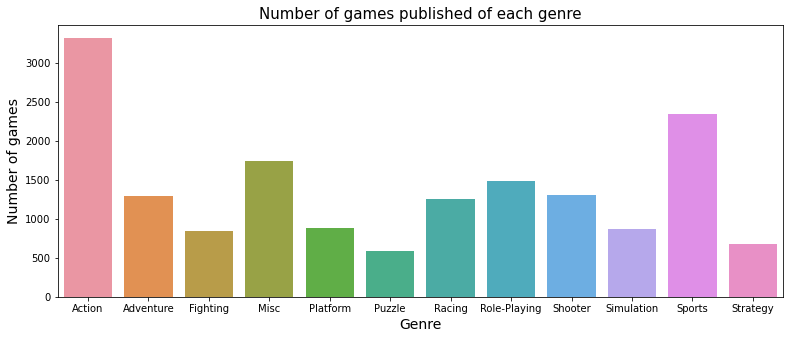

In [24]:
#grouping number of video games across each unique genres
result = video_game_df.groupby(['Genre']).size()
# plot the result
plt.figure(figsize=(13,5))
plt.title('Number of games published of each genre', fontsize=15)
plt.ylabel('Number of games', fontsize=14)
plt.xlabel('Genre', fontsize=14)
sns.barplot(x = result.index, y = result.values, alpha = 1.0);

#### From the graph, we can look at number of video games in each genre produced in the past. We can observe:
- Most number of games produced are action games, followed by sports games.

#### We have previously inferred that 'Platform', 'Shooter' and 'Role-Playing' games have generated most sales on an average. However, from this graph we can observe that most games are action games or sports games. We can infer:
- There is a big scope in platform games, shooter games and role-playing games. The market for this is not as saturated and hence investing in new games in these genres would likely have most chance in generating higher sales for studios.